# Storing the processed  listing and review dataset into a dataframe

In [4]:
import pandas as pd

listing_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing_amsterdam.csv")
print(listing_amsterdam_df.head())

                   id                                               name  \
0  888038298563003925                         Triple Room With City View   
1            50666229  Private loft next @Vondelpark with PRIVATE par...   
2              933523           Ecoluxe accommodation 'The Green Tunnel'   
3  656222143862971193  Amazing apartment canal view and private terrace!   
4            20259345                         Private Stairway to heaven   

                                         description  \
0  This tastefully decorated room has an elegant ...   
1  Vintage & private loft centrally situated in t...   
2  Spacious, ground level private ecoluxe two-roo...   
3  Great place to stay in the middle of the city ...   
4  Privat trendy loft studio at the attick of an ...   

                               neighborhood_overview    host_id  \
0                                                NaN  311321908   
1  Close to the Vondelpark, typical dutch houses,...  400851790   
2  Th

In [5]:
import pandas as pd

review_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_review_amsterdam.csv")
print(review_amsterdam_df.head())

  listing_id      id        date  \
0       2818  1191.0  2009-03-30   
1       2818  1771.0  2009-04-24   
2       2818  1989.0  2009-05-03   
3       2818  2797.0  2009-05-18   
4       2818  3151.0  2009-05-25   

                                            comments  city_id  
0  Daniel is really cool. The place was nice and ...      1.0  
1  Daniel is the most amazing host! His place is ...      1.0  
2  We had such a great time in Amsterdam. Daniel ...      1.0  
3  Very professional operation. Room is very clea...      1.0  
4  Daniel is highly recommended.  He provided all...      1.0  


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/1973606883.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  review_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_review_amsterdam.csv")


# Task 1 - Numerical Analysis for features like - price, minimum nights, maximum nights, number of rating and review_score_rating

In [6]:
# List of Features
features = ['price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']

# Calculate summary statistics
summary_stats = listing_amsterdam_df[features].describe()

# Display summary statistics
print(summary_stats)

              price  minimum_nights  maximum_nights  number_of_reviews  \
count   5187.000000     5187.000000     5187.000000        5187.000000   
mean     270.123771        3.595334      335.518026          70.077694   
std      235.183963       13.596789      416.983906         153.096242   
min       11.000000        1.000000        1.000000           1.000000   
25%      160.000000        2.000000       21.000000           5.000000   
50%      225.000000        2.000000       60.000000          14.000000   
75%      320.000000        3.000000      365.000000          62.000000   
max    10000.000000      729.000000     1125.000000        4130.000000   

       review_scores_rating  
count           5187.000000  
mean               4.831882  
std                0.263310  
min                1.000000  
25%                4.770000  
50%                4.910000  
75%                5.000000  
max                5.000000  


# Analyzing the distribution of the data by calculating the variance

In [7]:
# Variance
variance = listing_amsterdam_df[features].var()

# Interquartile Range (IQR)
Q1 = listing_amsterdam_df[features].quantile(0.25)
Q3 = listing_amsterdam_df[features].quantile(0.75)
IQR = Q3 - Q1

print("Variance:\n", variance)
print("IQR:\n", IQR)

Variance:
 price                    55311.496440
minimum_nights             184.872659
maximum_nights          173875.577529
number_of_reviews        23438.459254
review_scores_rating         0.069332
dtype: float64
IQR:
 price                   160.00
minimum_nights            1.00
maximum_nights          344.00
number_of_reviews        57.00
review_scores_rating      0.23
dtype: float64


# Task 2 - Part A:Creating a histogram using the output obtained 

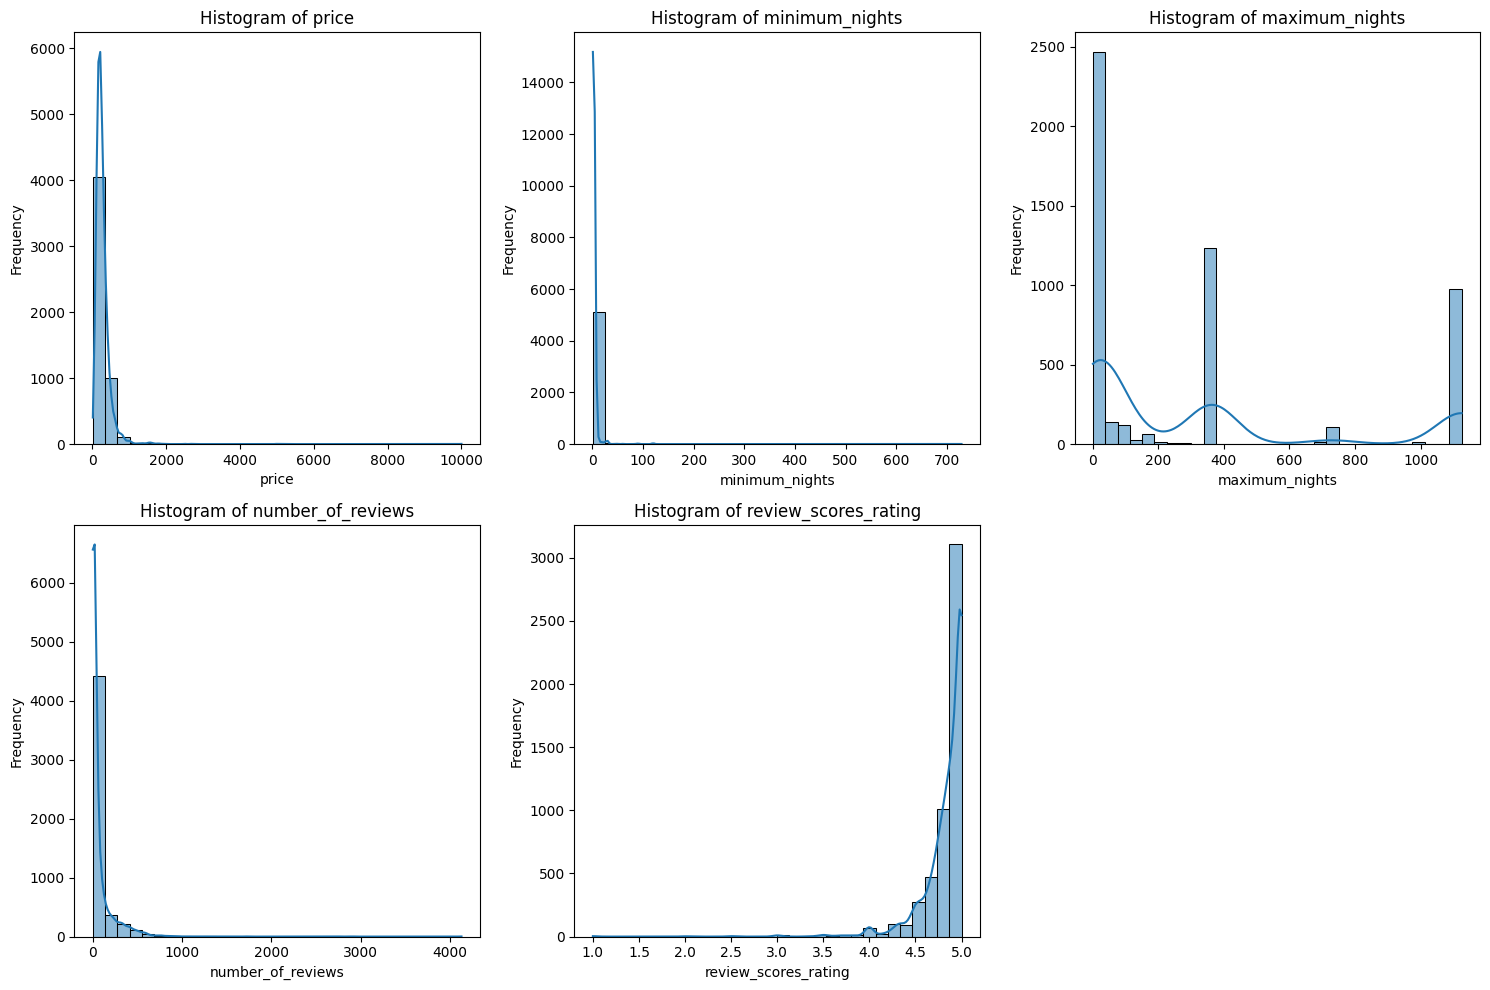

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(listing_amsterdam_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Task 2 - Part B:Using Density Plots to visualize the data distribution 

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/3891147462.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_df['price'], shade=True, color='blue')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/3891147462.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_df['minimum_nights'], shade=True, color='green')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/3891147462.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listing_amsterdam_df['maximum_nights'], shade=True, color='yellow')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/i

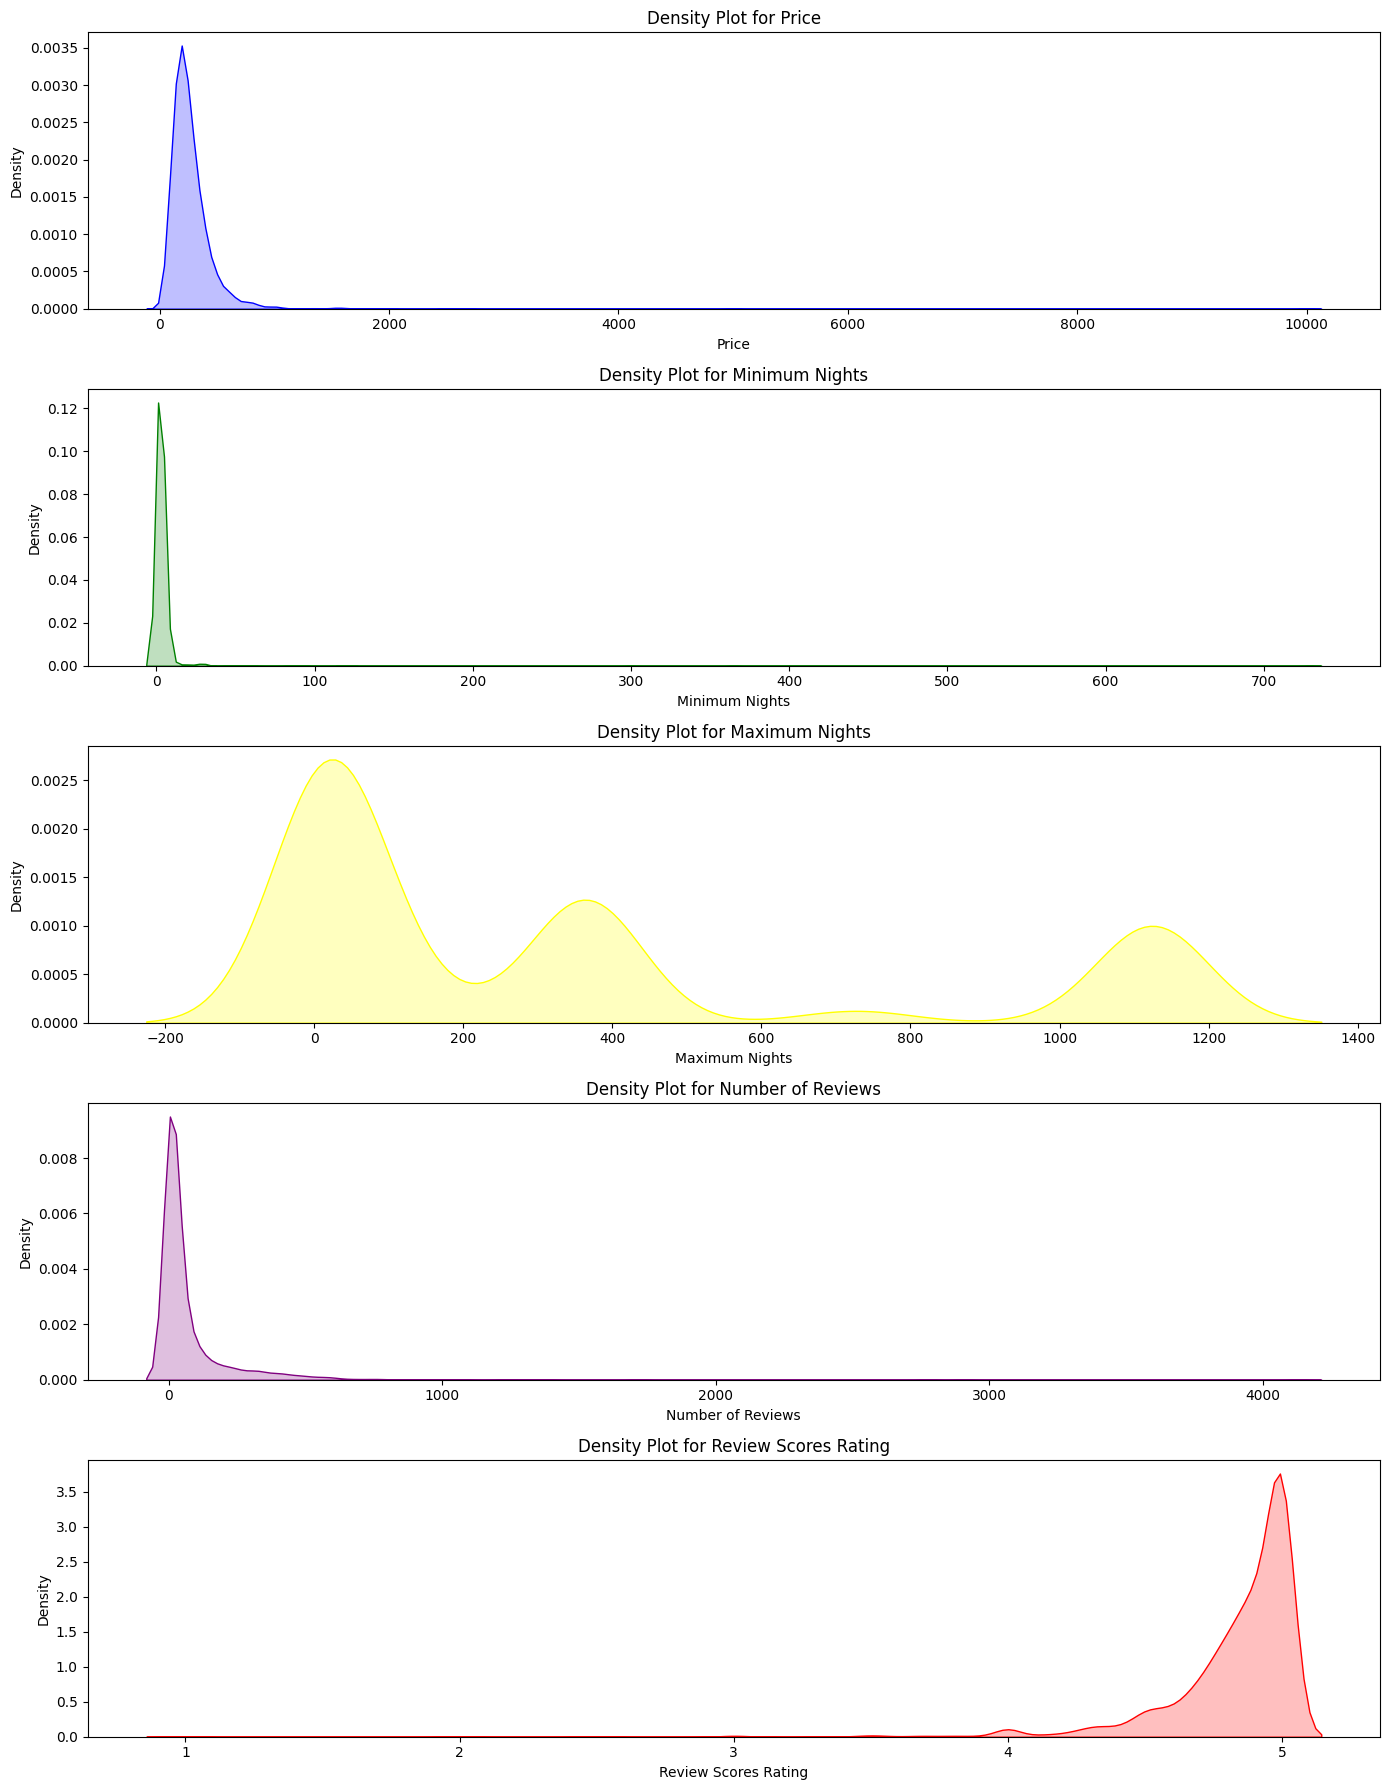

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(listing_amsterdam_df['price'], shade=True, color='blue')
plt.title('Density Plot for Price')
plt.xlabel('Price')

# Plot KDE for 'minimum_nights'
plt.subplot(5, 1, 2)  # 3 rows, 1 column, 2nd plot
sns.kdeplot(listing_amsterdam_df['minimum_nights'], shade=True, color='green')
plt.title('Density Plot for Minimum Nights')
plt.xlabel('Minimum Nights')

plt.subplot(5, 1, 3)  # 3 rows, 1 column, 2nd plot
sns.kdeplot(listing_amsterdam_df['maximum_nights'], shade=True, color='yellow')
plt.title('Density Plot for Maximum Nights')
plt.xlabel('Maximum Nights')

plt.subplot(5, 1, 4)  # 3 rows, 1 column, 2nd plot
sns.kdeplot(listing_amsterdam_df['number_of_reviews'], shade=True, color='purple')
plt.title('Density Plot for Number of Reviews')
plt.xlabel('Number of Reviews')

# Plot KDE for 'review_scores_rating'
plt.subplot(5, 1, 5)  # 3 rows, 1 column, 3rd plot
sns.kdeplot(listing_amsterdam_df['review_scores_rating'], shade=True, color='red')
plt.title('Density Plot for Review Scores Rating')
plt.xlabel('Review Scores Rating')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# Printing the total of no. of rows and features in the listing and review dataset available for Amsterdam 

In [10]:
print(listing_amsterdam_df.shape)

(5187, 61)


# Getting mor einsights about outliers for price, minimum_nights and maximum_nights using binning technique

In [42]:
import pandas as pd

price_bins = [0,164,225,321,2000,10000]

listing_amsterdam_df['binned_price'] = pd.cut(listing_amsterdam_df['price'],price_bins)

price_bins_count = listing_amsterdam_df['binned_price'].value_counts()

print(price_bins_count)

binned_price
(0, 164]         1368
(225, 321]       1284
(321, 2000]      1276
(164, 225]       1255
(2000, 10000]       4
Name: count, dtype: int64


In [12]:
import pandas as pd

min_night_bins = [0,1,2,3,10,25,50,100,500,729]

listing_amsterdam_df['binned_min_nights'] = pd.cut(listing_amsterdam_df['minimum_nights'],min_night_bins)

min_night_bin_count = listing_amsterdam_df['binned_min_nights'].value_counts()

print(min_night_bin_count)

binned_min_nights
(1, 2]        1567
(2, 3]        1394
(0, 1]        1087
(3, 10]       1033
(10, 25]        47
(25, 50]        40
(100, 500]      10
(50, 100]        8
(500, 729]       1
Name: count, dtype: int64


In [13]:
import pandas as pd

max_night_bins = [0,1,21,60,365,500,750,1000,1125]

listing_amsterdam_df['binned_max_nights'] = pd.cut(listing_amsterdam_df['maximum_nights'],max_night_bins)

max_night_bin_count = listing_amsterdam_df['binned_max_nights'].value_counts()

print(max_night_bin_count)

binned_max_nights
(60, 365]       1474
(1, 21]         1328
(21, 60]        1256
(1000, 1125]     990
(500, 750]       121
(0, 1]            14
(365, 500]         3
(750, 1000]        1
Name: count, dtype: int64


# Removing the outliers detected in the price column

In [47]:
filtered_listing_amsterdam_df = listing_amsterdam_df[listing_amsterdam_df['price'] < 2000]

print(filtered_listing_amsterdam_df.shape)

(5182, 64)


# Removing the outliers detected in the minimum_nights column

In [48]:
filtered_listing_amsterdam_df = filtered_listing_amsterdam_df[listing_amsterdam_df['minimum_nights'] < 10]

print(filtered_listing_amsterdam_df.shape)

(5055, 64)


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/161300309.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_listing_amsterdam_df = filtered_listing_amsterdam_df[listing_amsterdam_df['minimum_nights'] < 10]


# Repeating Task 1 - Numerical Analysis for features like - price, minimum nights, maximum nights, number of rating and review_score_rating

In [49]:
# List of Features
features = ['price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']

#  Calculate summary statistics
filtered_summary_stats = filtered_listing_amsterdam_df[features].describe()

# Display summary statistics
print(filtered_summary_stats)

             price  minimum_nights  maximum_nights  number_of_reviews  \
count  5055.000000     5055.000000     5055.000000        5055.000000   
mean    267.721464        2.647280      335.664688          71.341246   
std     174.296327        1.428836      418.572918         154.698907   
min      11.000000        1.000000        1.000000           1.000000   
25%     161.000000        2.000000       21.000000           5.000000   
50%     225.000000        2.000000       60.000000          14.000000   
75%     321.000000        3.000000      365.000000          64.500000   
max    1900.000000        9.000000     1125.000000        4130.000000   

       review_scores_rating  
count           5055.000000  
mean               4.832872  
std                0.255892  
min                1.000000  
25%                4.770000  
50%                4.910000  
75%                5.000000  
max                5.000000  


# Analyzing the distribution of the filtered data by calculating the variance

In [50]:
# Variance
features = ['price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']

variance = filtered_listing_amsterdam_df[features].var()

# Interquartile Range (IQR)
Q1 = filtered_listing_amsterdam_df[features].quantile(0.25)
Q3 = filtered_listing_amsterdam_df[features].quantile(0.75)
IQR = Q3 - Q1

print("Variance:\n", variance)
print("IQR:\n", IQR)

Variance:
 price                    30379.209699
minimum_nights               2.041571
maximum_nights          175203.287425
number_of_reviews        23931.751949
review_scores_rating         0.065481
dtype: float64
IQR:
 price                   160.00
minimum_nights            1.00
maximum_nights          344.00
number_of_reviews        59.50
review_scores_rating      0.23
dtype: float64


# Task 2 - Part A:Creating a histogram using the filtreed output obtained 

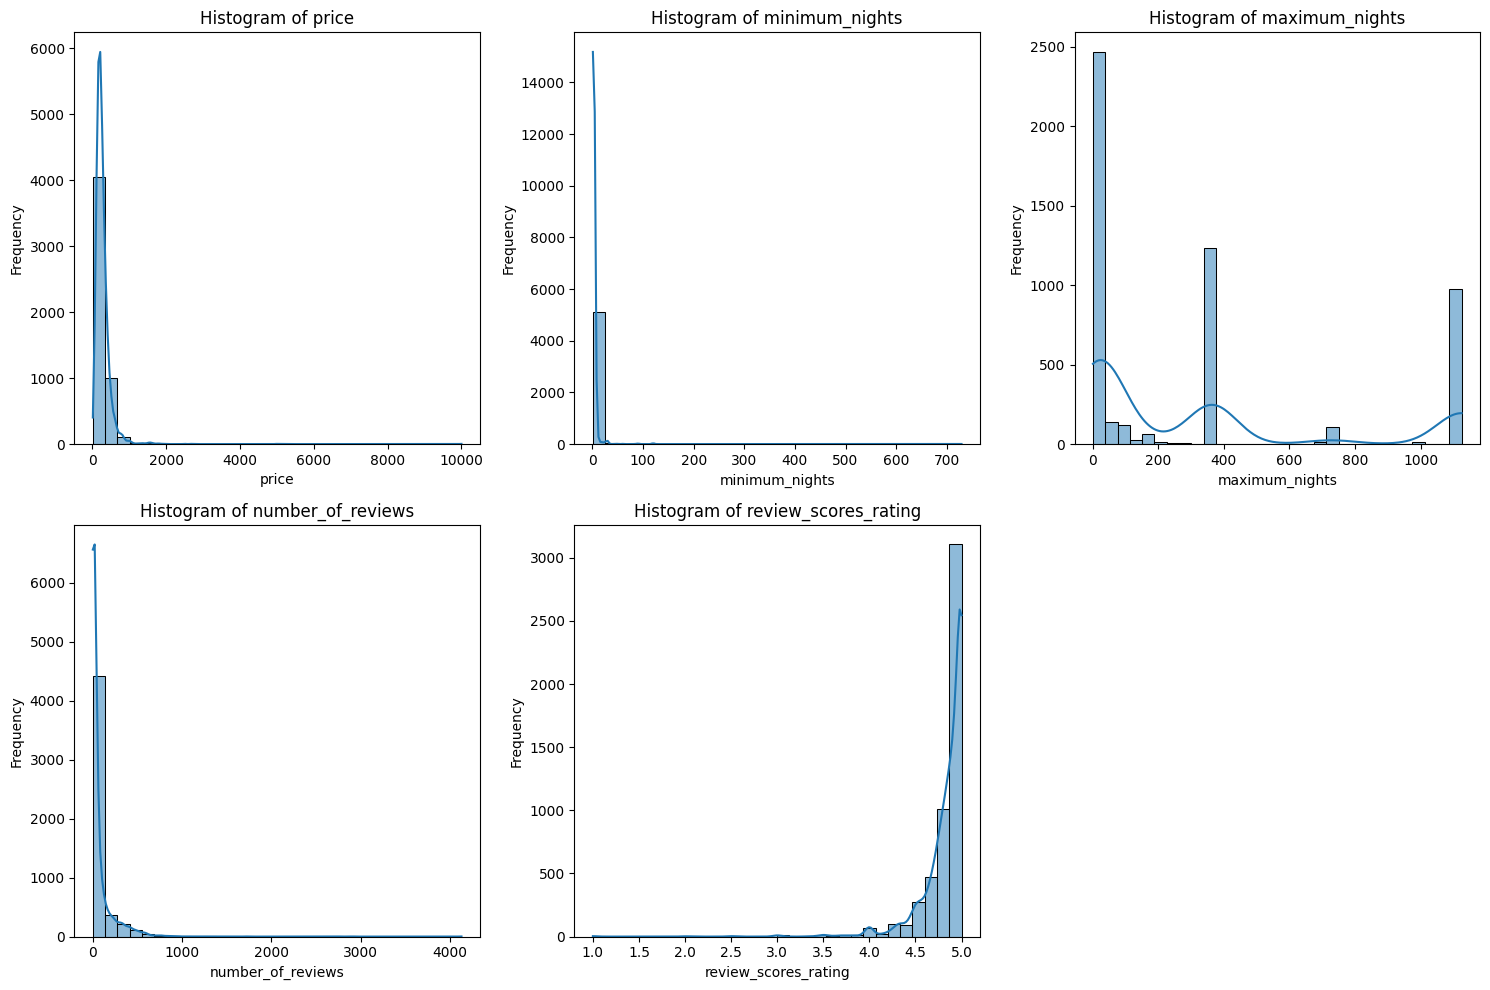

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and features is your list of features
# features = ['price', 'minimum_nights', 'number_of_reviews']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(listing_amsterdam_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Task 2 - Part B:Using Density Plots to visualize the filtered data distribution 

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/556465021.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_df['price'], shade=True, color='blue')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/556465021.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_df['minimum_nights'], shade=True, color='green')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_39310/556465021.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_listing_amsterdam_df['maximum_nights'], shade=True, color='yellow')
/var/folders/nb/sgb5l3c56g

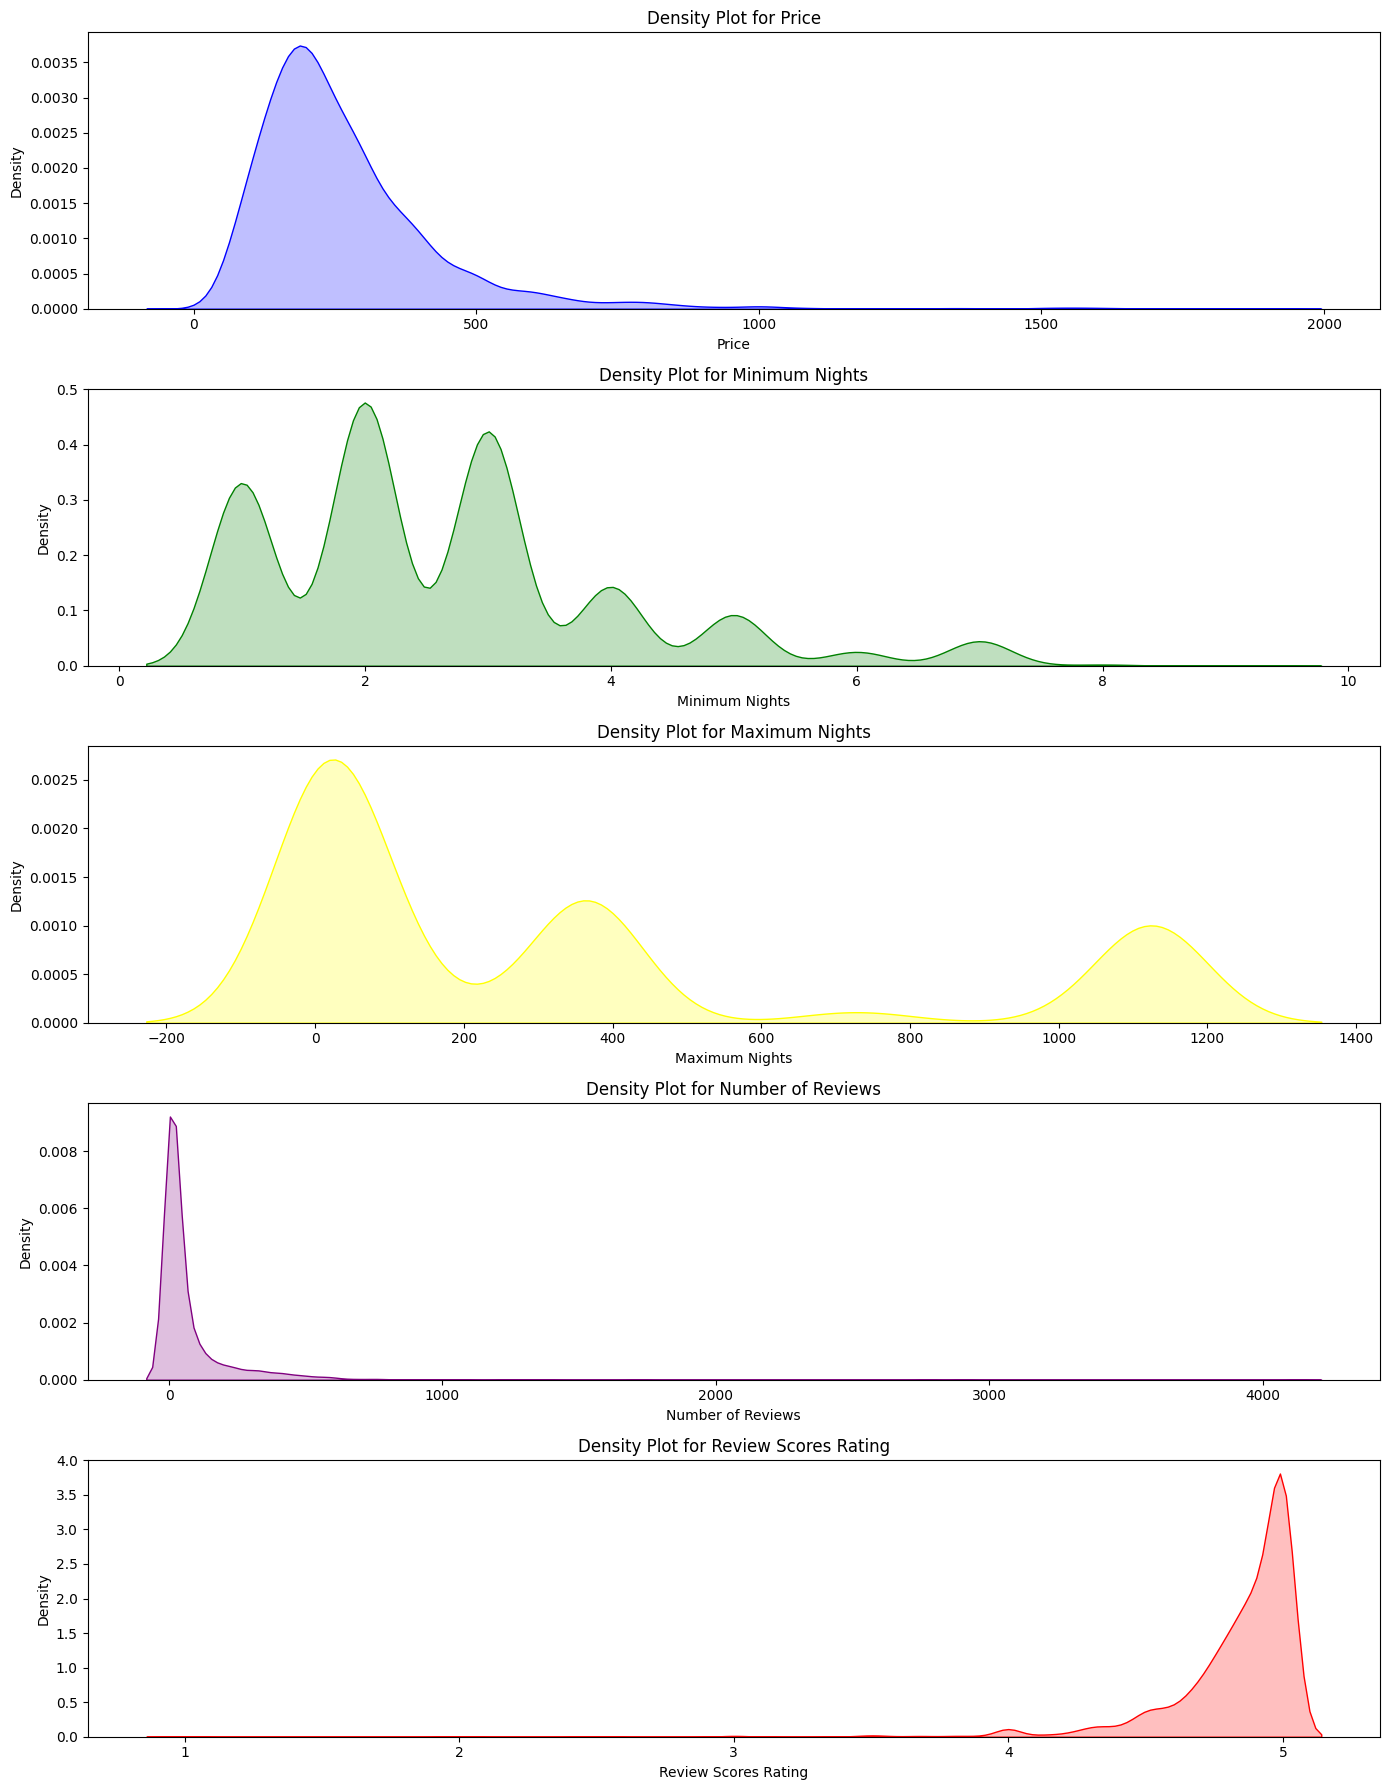

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visualization
plt.figure(figsize=(14, 18))

# Plot KDE for 'price'
plt.subplot(5, 1, 1)  # 3 rows, 1 column, 1st plot
sns.kdeplot(filtered_listing_amsterdam_df['price'], shade=True, color='blue')
plt.title('Density Plot for Price')
plt.xlabel('Price')

# Plot KDE for 'minimum_nights'
plt.subplot(5, 1, 2)  # 3 rows, 1 column, 2nd plot
sns.kdeplot(filtered_listing_amsterdam_df['minimum_nights'], shade=True, color='green')
plt.title('Density Plot for Minimum Nights')
plt.xlabel('Minimum Nights')

plt.subplot(5, 1, 3)  # 3 rows, 1 column, 2nd plot
sns.kdeplot(filtered_listing_amsterdam_df['maximum_nights'], shade=True, color='yellow')
plt.title('Density Plot for Maximum Nights')
plt.xlabel('Maximum Nights')

plt.subplot(5, 1, 4)  # 3 rows, 1 column, 2nd plot
sns.kdeplot(filtered_listing_amsterdam_df['number_of_reviews'], shade=True, color='purple')
plt.title('Density Plot for Number of Reviews')
plt.xlabel('Number of Reviews')

# Plot KDE for 'review_scores_rating'
plt.subplot(5, 1, 5)  # 3 rows, 1 column, 3rd plot
sns.kdeplot(filtered_listing_amsterdam_df['review_scores_rating'], shade=True, color='red')
plt.title('Density Plot for Review Scores Rating')
plt.xlabel('Review Scores Rating')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# Task 3 - Conducting Correlation Analysis to explore the relationship between numerical variables such as price, number of reviews, availability_365, review score rating

In [53]:
features = ['price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']

corr_matrix = filtered_listing_amsterdam_df[features].corr()

# Print the correlation matrix
print(corr_matrix)

                         price  minimum_nights  maximum_nights  \
price                 1.000000        0.094965       -0.067997   
minimum_nights        0.094965        1.000000       -0.159758   
maximum_nights       -0.067997       -0.159758        1.000000   
number_of_reviews    -0.210275       -0.170210        0.179584   
review_scores_rating  0.127178        0.134901       -0.099724   

                      number_of_reviews  review_scores_rating  
price                         -0.210275              0.127178  
minimum_nights                -0.170210              0.134901  
maximum_nights                 0.179584             -0.099724  
number_of_reviews              1.000000             -0.056688  
review_scores_rating          -0.056688              1.000000  


# Visualizing the results obtained during correlation analysis on a heat map 

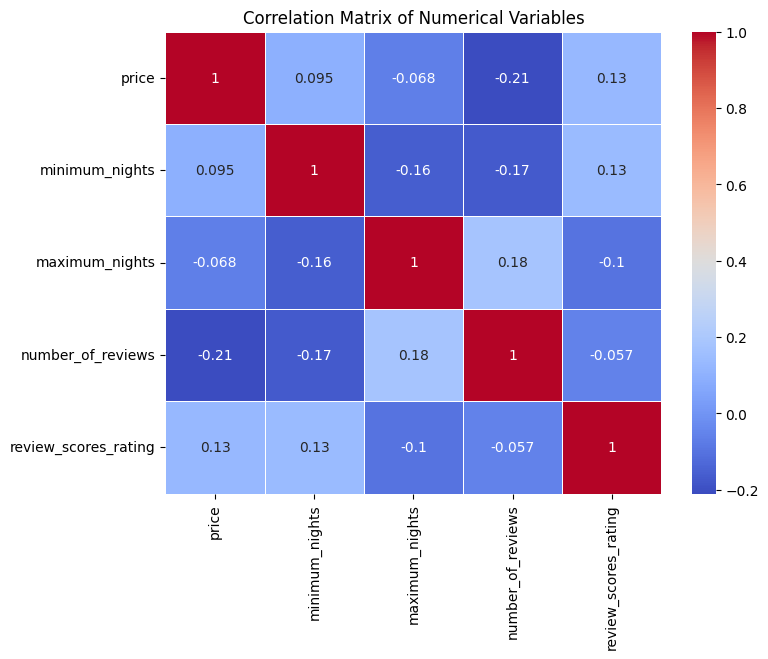

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Analyzed the data frame and inferred that fields like accomodates and bedrooms could provide better correlation metrics

In [55]:
print(filtered_listing_amsterdam_df['accommodates'].info())

<class 'pandas.core.series.Series'>
Index: 5055 entries, 0 to 5186
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
5055 non-null   int64
dtypes: int64(1)
memory usage: 79.0 KB
None


In [56]:
print(filtered_listing_amsterdam_df['bedrooms'].info())

<class 'pandas.core.series.Series'>
Index: 5055 entries, 0 to 5186
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
5053 non-null   float64
dtypes: float64(1)
memory usage: 79.0 KB
None


In [57]:
features = ['price','accommodates','bedrooms','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']

corr_matrix_updated = filtered_listing_amsterdam_df[features].corr()

# Print the correlation matrix
print(corr_matrix_updated)

                         price  accommodates  bedrooms  minimum_nights  \
price                 1.000000      0.507728  0.512213        0.094965   
accommodates          0.507728      1.000000  0.739404        0.079708   
bedrooms              0.512213      0.739404  1.000000        0.190445   
minimum_nights        0.094965      0.079708  0.190445        1.000000   
maximum_nights       -0.067997      0.003743 -0.079944       -0.159758   
number_of_reviews    -0.210275     -0.093680 -0.162465       -0.170210   
review_scores_rating  0.127178     -0.037000  0.058484        0.134901   

                      maximum_nights  number_of_reviews  review_scores_rating  
price                      -0.067997          -0.210275              0.127178  
accommodates                0.003743          -0.093680             -0.037000  
bedrooms                   -0.079944          -0.162465              0.058484  
minimum_nights             -0.159758          -0.170210              0.134901  
maximum

# Visualizing the results obtained during correlation analysis on a heat map 

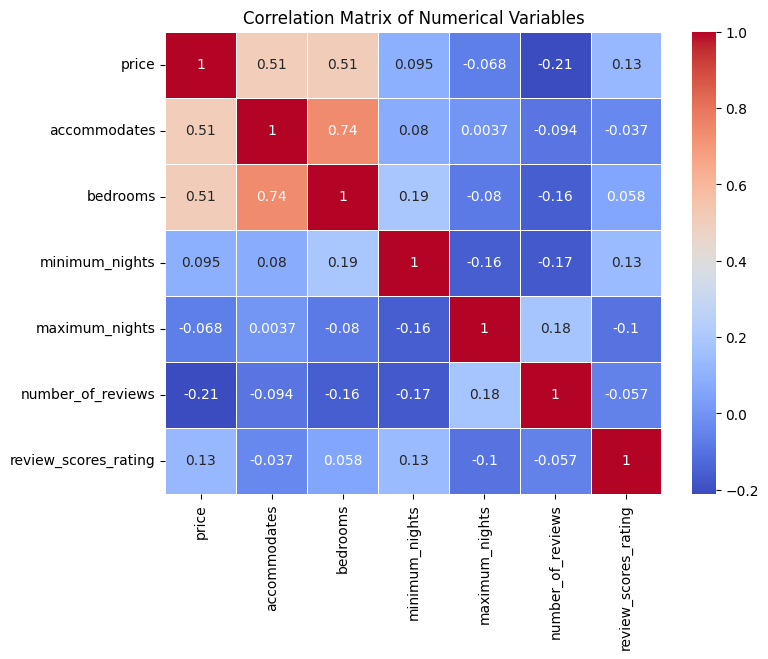

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_updated, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Task 4 - Analyzing neighorhood and room type features

In [60]:
print(listing_amsterdam_df['room_type'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5187 entries, 0 to 5186
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
5187 non-null   object
dtypes: object(1)
memory usage: 40.7+ KB
None


In [61]:
print(listing_amsterdam_df['host_neighbourhood'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5187 entries, 0 to 5186
Series name: host_neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
1498 non-null   object
dtypes: object(1)
memory usage: 40.7+ KB
None


In [62]:
print(listing_amsterdam_df['room_type'].value_counts())  # Distribution of room types

room_type
Entire home/apt    3781
Private room       1366
Hotel room           30
Shared room          10
Name: count, dtype: int64


In [63]:
print(listing_amsterdam_df['host_neighbourhood'].value_counts()) 

host_neighbourhood
Oud-West                           225
Grachtengordel                     163
Jordaan                            111
De Pijp                            102
Oosterparkbuurt                     72
Nieuwmarkt en Lastage               59
Oost                                50
Amsterdam Centrum                   46
Bos en Lommer                       44
Indische Buurt                      43
De Wallen                           40
Hoofddorppleinbuurt                 39
Westelijke Eilanden                 36
Rivierenbuurt                       33
Weesperbuurt en Plantage            32
Watergraafsmeer                     29
Spaarndammer en Zeeheldenbuurt      28
Oud-Zuid                            27
Zeeburg                             26
Oostelijke Eilanden en Kadijken     23
Stadionbuurt                        23
Slotervaart                         22
Museumkwartier                      21
Frederik Hendrikbuurt               20
Oostzanerwerf                       18
Tuindo

# Removing neighbourhood with listings fewer than 23 as there are numerous neighbour hood types

In [64]:
# Step 1: Count the number of listings per neighborhood
neighbourhood_counts = filtered_listing_amsterdam_df['host_neighbourhood'].value_counts()

# Step 2: Filter neighborhoods with at least 23 listings
neighbourhoods_with_23_or_more = neighbourhood_counts[neighbourhood_counts >= 23].index

# Step 3: Filter the DataFrame to keep only these neighborhoods
neighborhood_filtered_listing_amsterdam_df = filtered_listing_amsterdam_df[filtered_listing_amsterdam_df['host_neighbourhood'].isin(neighbourhoods_with_23_or_more)]

# Step 4: Print the updated count of neighborhoods
print(neighborhood_filtered_listing_amsterdam_df['host_neighbourhood'].value_counts())

host_neighbourhood
Oud-West                          219
Grachtengordel                    156
Jordaan                           107
De Pijp                           101
Oosterparkbuurt                    69
Nieuwmarkt en Lastage              58
Oost                               50
Amsterdam Centrum                  46
Bos en Lommer                      43
Indische Buurt                     41
De Wallen                          39
Hoofddorppleinbuurt                39
Westelijke Eilanden                35
Weesperbuurt en Plantage           32
Rivierenbuurt                      31
Watergraafsmeer                    29
Spaarndammer en Zeeheldenbuurt     28
Oud-Zuid                           27
Zeeburg                            26
Stadionbuurt                       23
Name: count, dtype: int64


In [65]:
print(neighborhood_filtered_listing_amsterdam_df.shape)

(1199, 64)


In [66]:
print(filtered_listing_amsterdam_df.shape)

(5055, 64)


# Task 4 - Part A: Distribution of prices across different neighbourhood

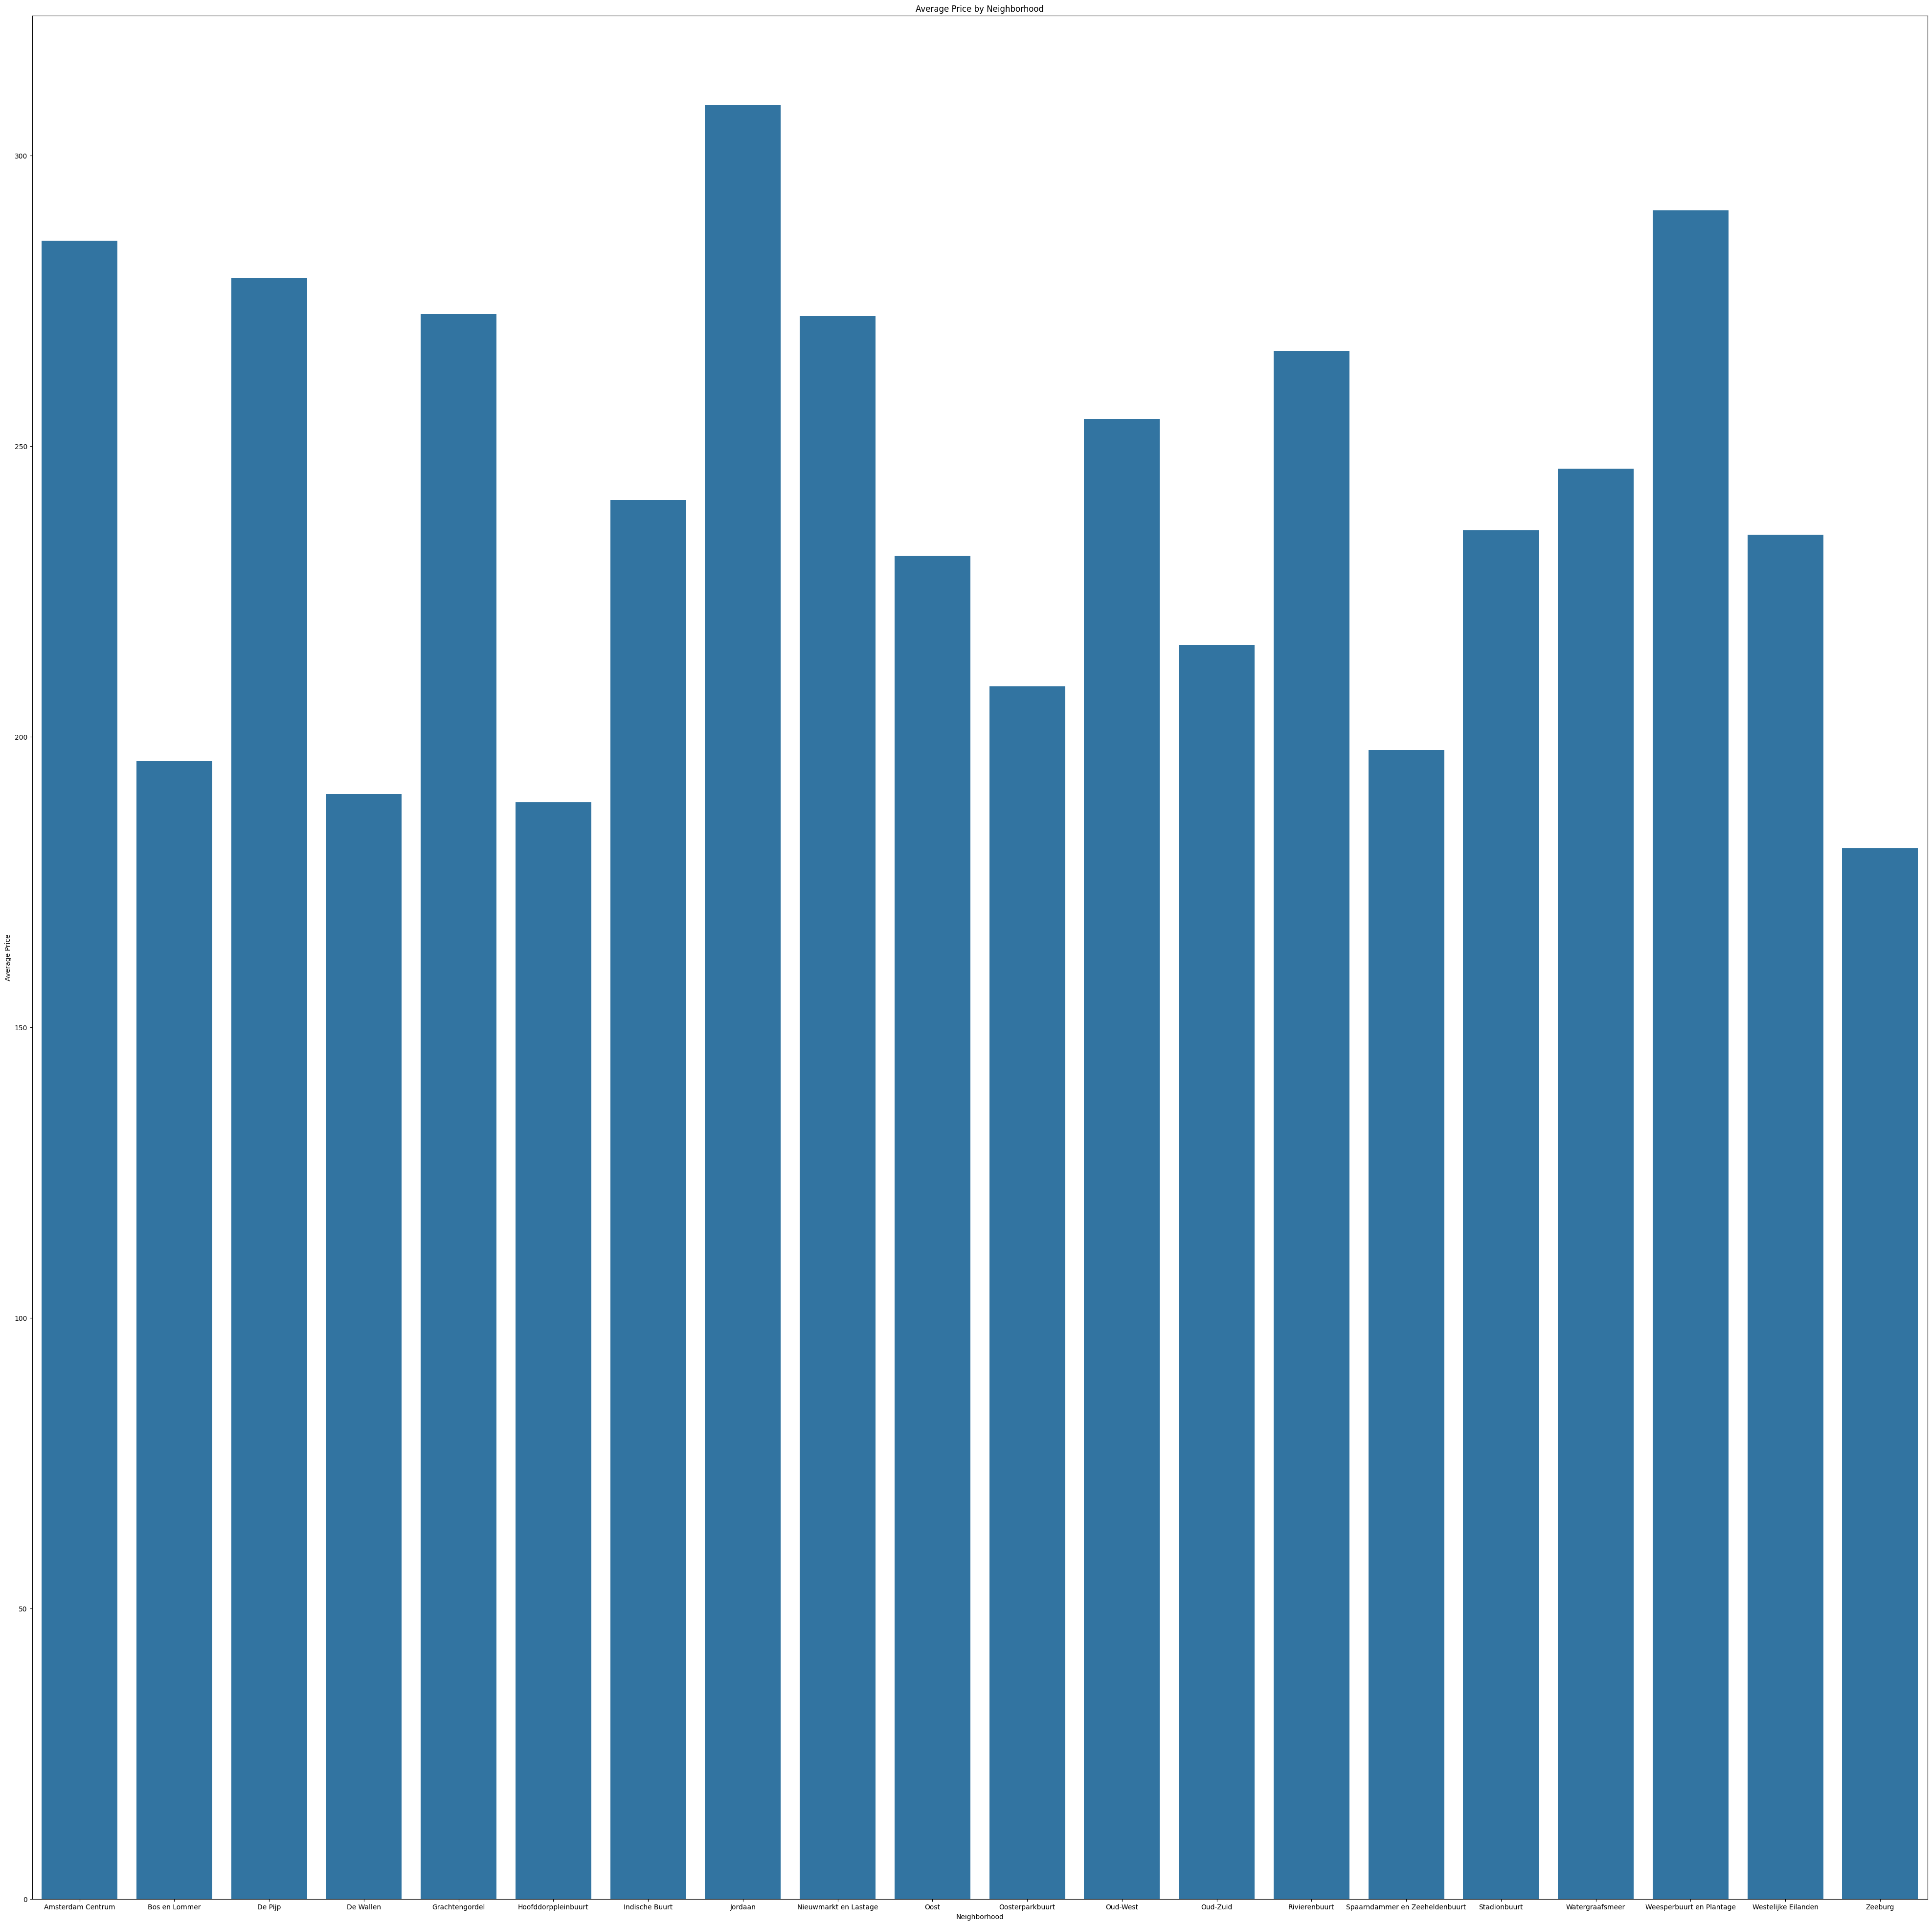

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by neighborhood and calculate the average price
neighbourhood_price = neighborhood_filtered_listing_amsterdam_df.groupby('host_neighbourhood')['price'].mean().reset_index()

# Plot the average price by neighborhood
plt.figure(figsize=(50, 50))
sns.barplot(x='host_neighbourhood', y='price', data=neighbourhood_price)
plt.title('Average Price by Neighborhood')
plt.ylabel('Average Price')
plt.xlabel('Neighborhood')
plt.show()

# Task 4 - Part B: Distribution of prices across different room types

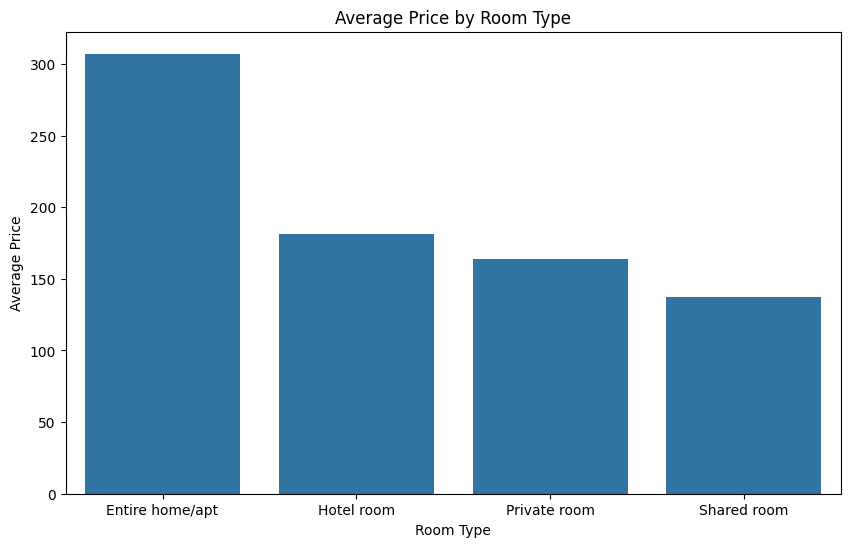

In [68]:
# Group by room type and calculate the average price
room_type_price = filtered_listing_amsterdam_df.groupby('room_type')['price'].mean().reset_index()

# Plot the average price by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=room_type_price)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.show()

# Task 4 - Part C(i): Distribution of minimum stays across different neighbourhood

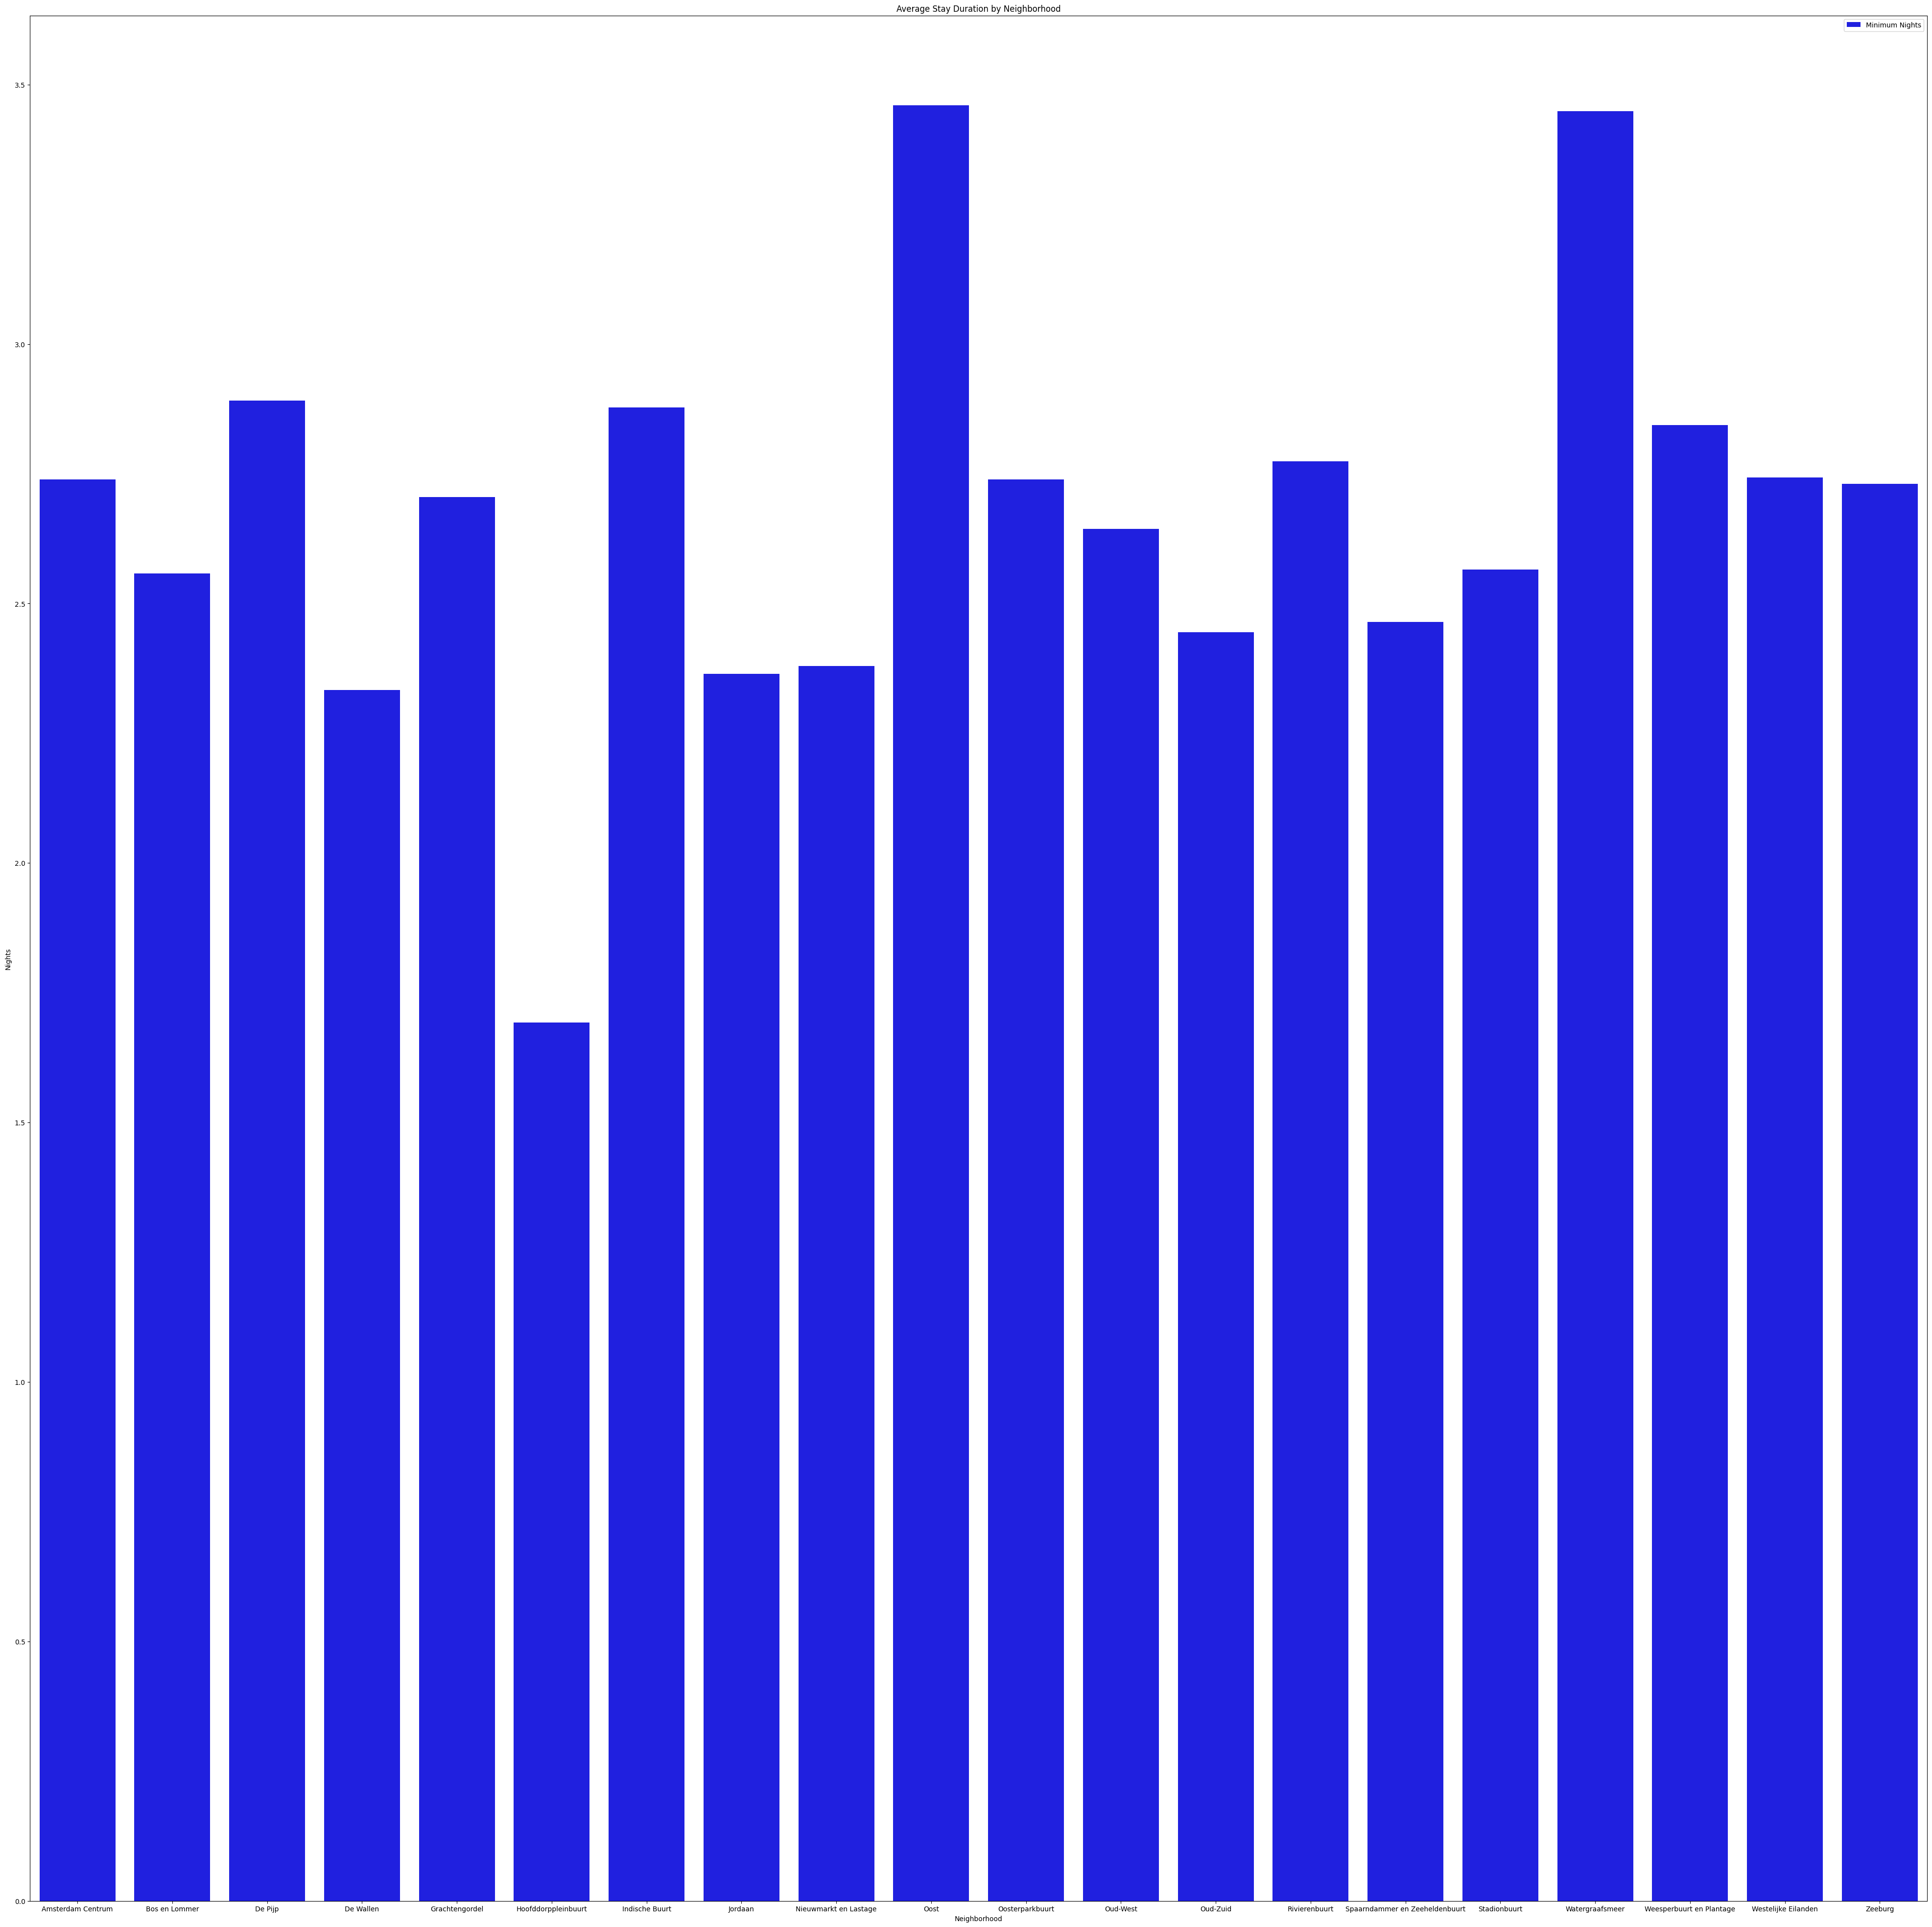

In [69]:
# Group by neighborhood and calculate the average minimum_nights and maximum_nights
neighbourhood_stay = neighborhood_filtered_listing_amsterdam_df.groupby('host_neighbourhood')[['minimum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by neighborhood
plt.figure(figsize=(50, 50))
sns.barplot(x='host_neighbourhood', y='minimum_nights', data=neighbourhood_stay, color='blue', label='Minimum Nights')
plt.title('Average Stay Duration by Neighborhood')
plt.ylabel('Nights')
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

# Task 4 - Part C(ii): Distribution of maximum stays across different neighbourhood

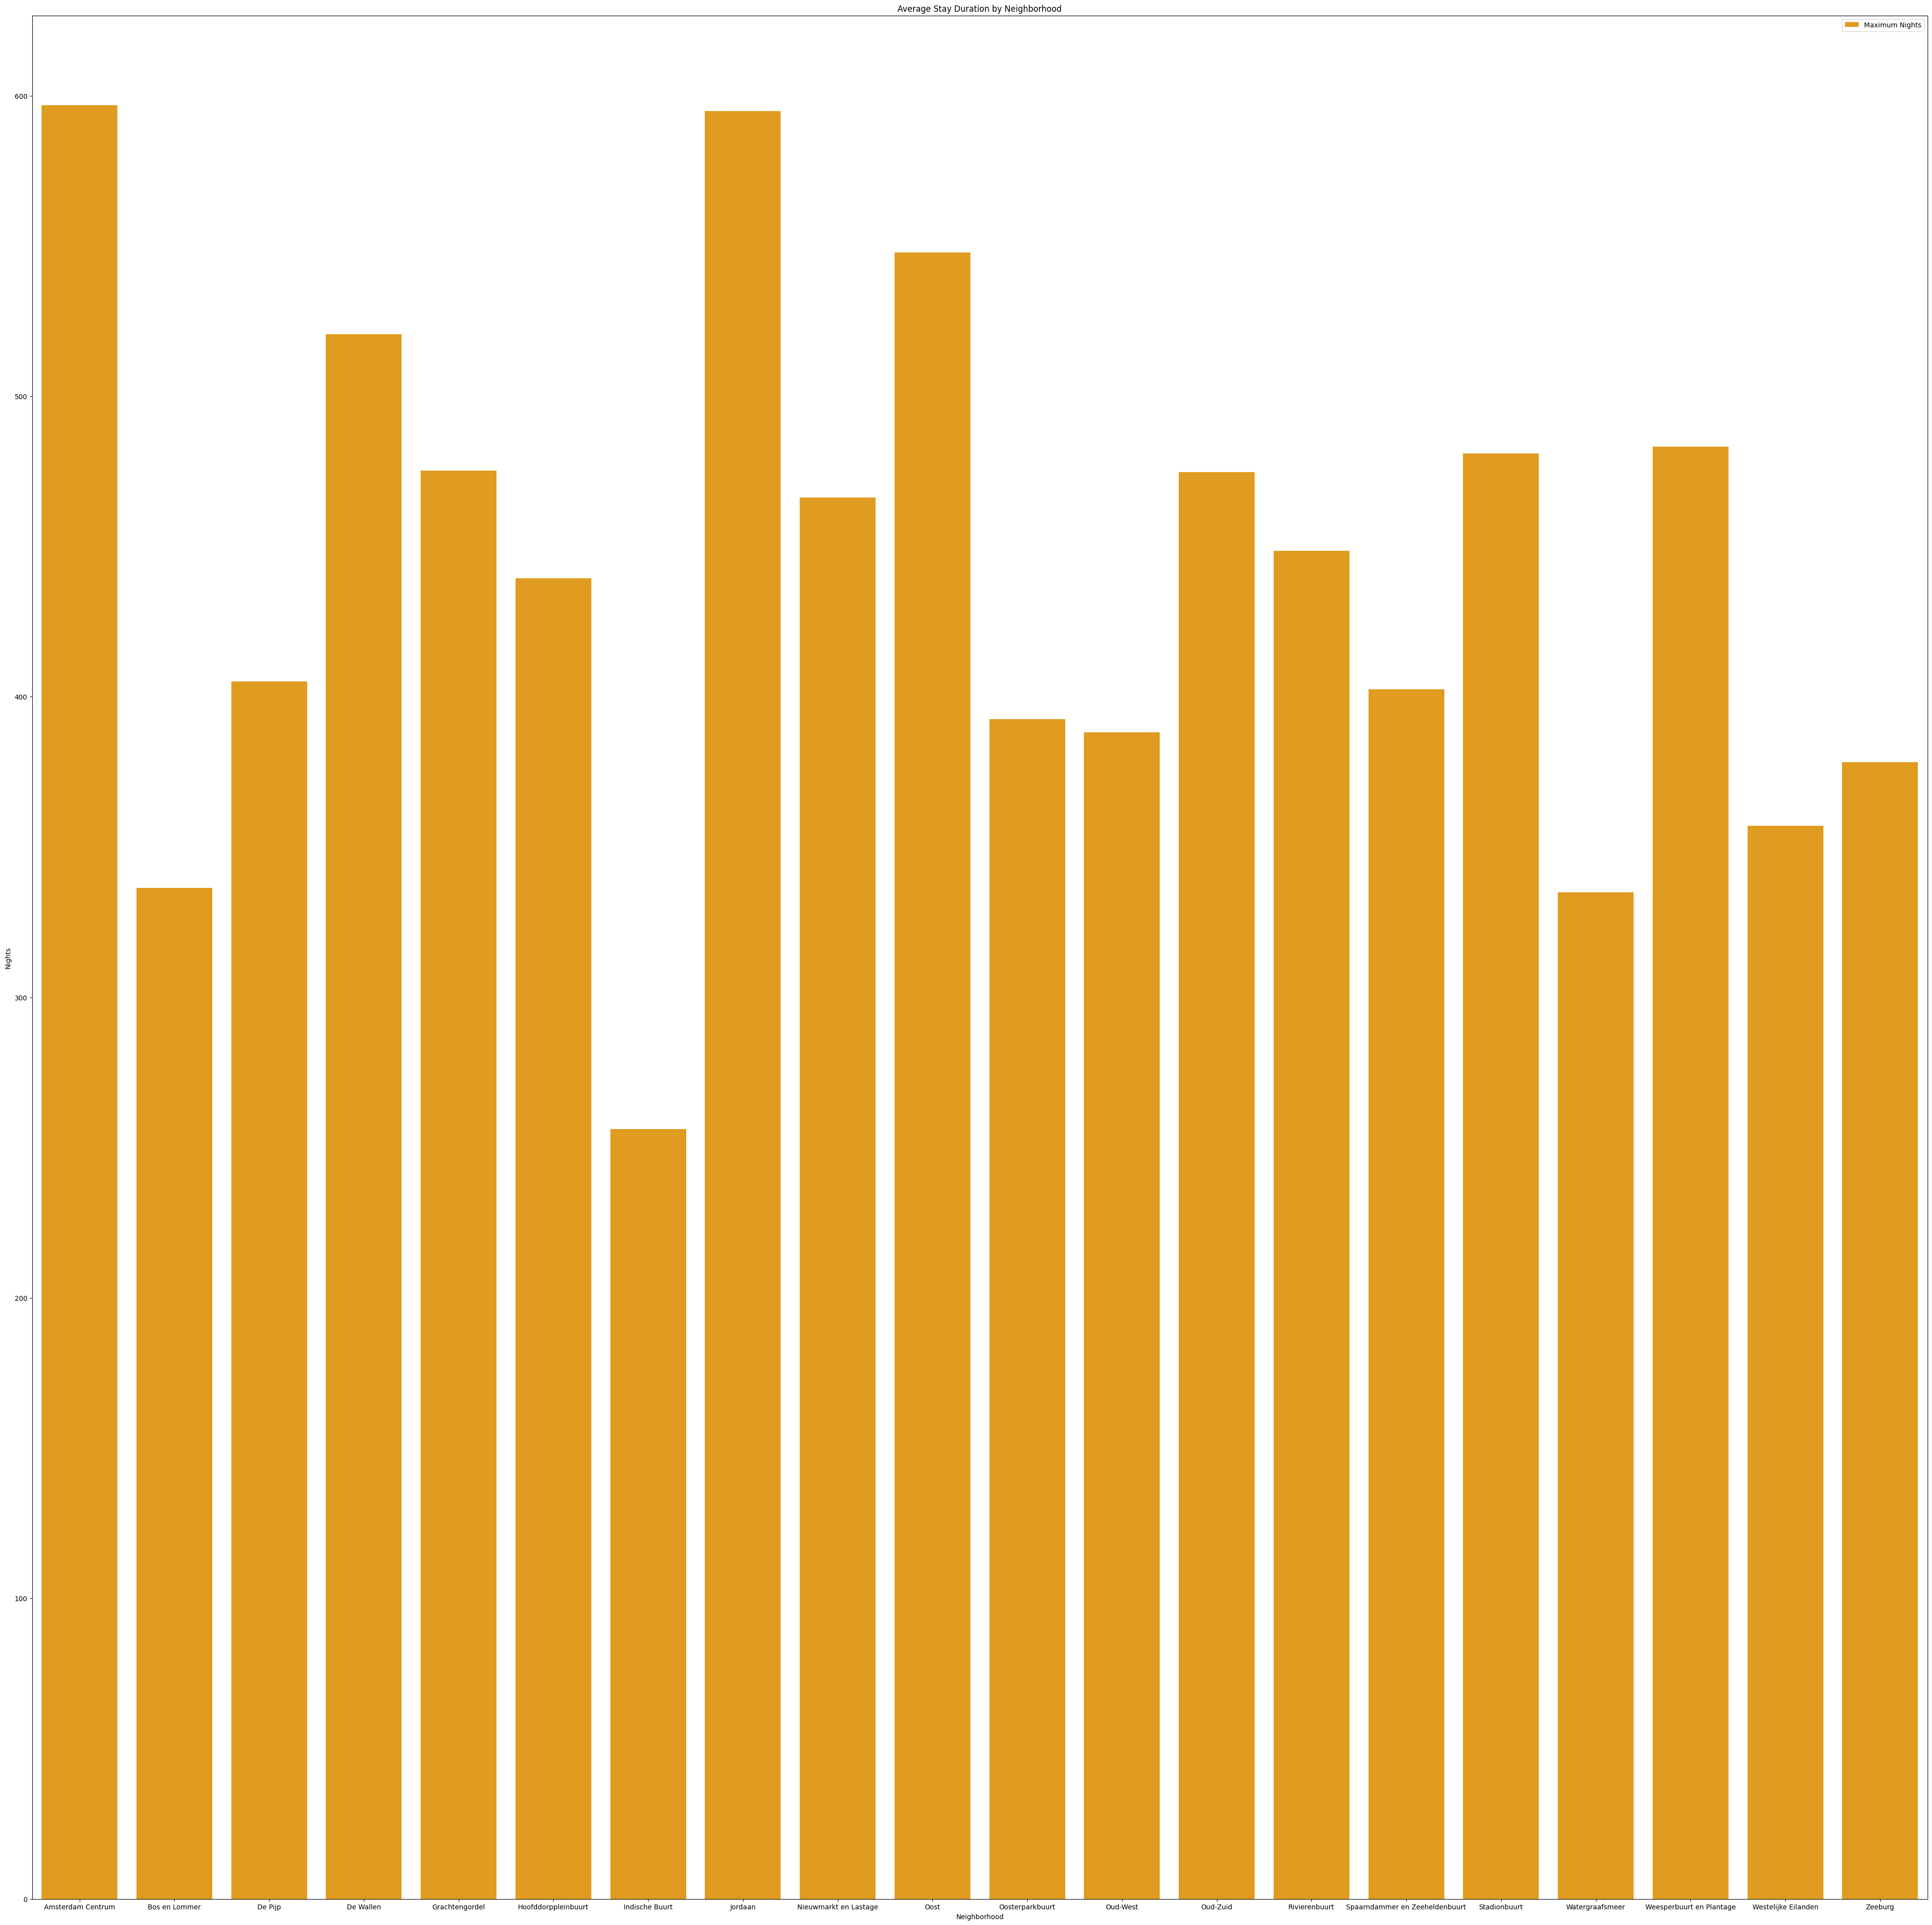

In [70]:
# Group by neighborhood and calculate the average minimum_nights and maximum_nights
neighbourhood_stay = neighborhood_filtered_listing_amsterdam_df.groupby('host_neighbourhood')[['maximum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by neighborhood
plt.figure(figsize=(50, 50))
sns.barplot(x='host_neighbourhood', y='maximum_nights', data=neighbourhood_stay, color='orange', label='Maximum Nights')
plt.title('Average Stay Duration by Neighborhood')
plt.ylabel('Nights')
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

# Task 4 - Part C(iii): Distribution of minimum stays across different room types

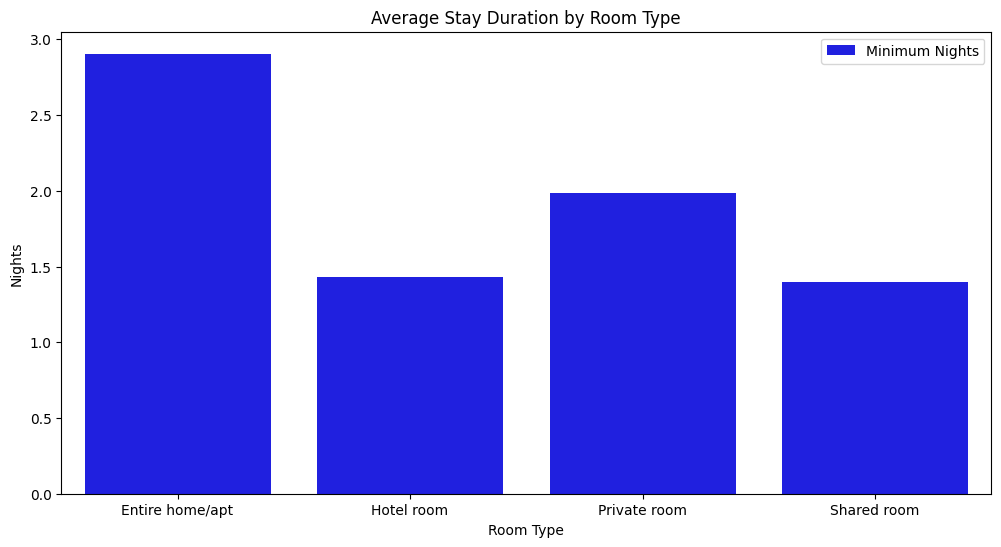

In [71]:
# Group by room type and calculate the average minimum_nights and maximum_nights
room_type_stay = filtered_listing_amsterdam_df.groupby('room_type')[['minimum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by room type
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='minimum_nights', data=room_type_stay, color='blue', label='Minimum Nights')
# sns.barplot(x='room_type', y='maximum_nights', data=room_type_stay, color='orange', label='Maximum Nights')
plt.title('Average Stay Duration by Room Type')
plt.ylabel('Nights')
plt.xlabel('Room Type')
plt.legend()
plt.show()

# Task 4 - Part C(iv): Distribution of maximum stays across different room types

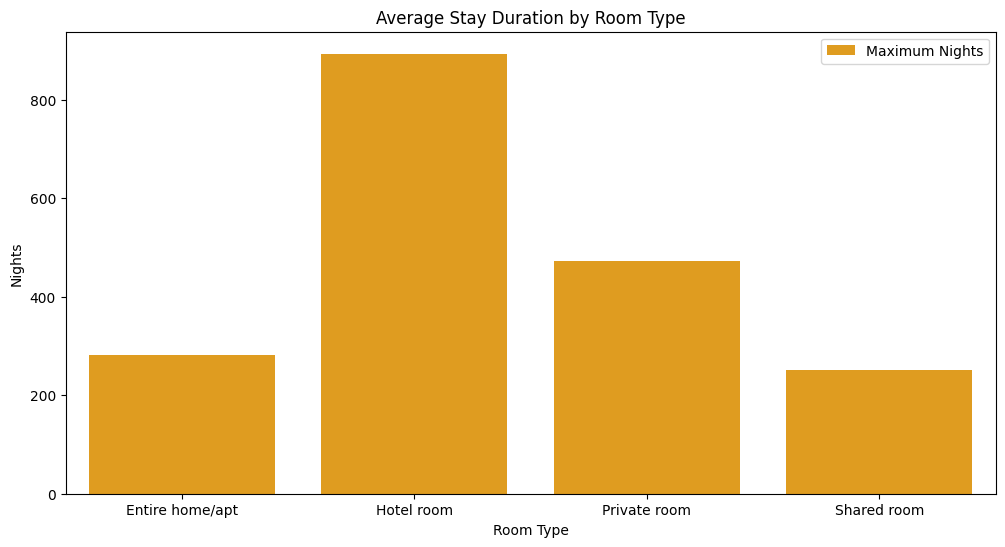

In [72]:
# Group by room type and calculate the average minimum_nights and maximum_nights
room_type_stay = filtered_listing_amsterdam_df.groupby('room_type')[['maximum_nights']].mean().reset_index()

# Plot the average minimum and maximum nights by room type
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='maximum_nights', data=room_type_stay, color='orange', label='Maximum Nights')
plt.title('Average Stay Duration by Room Type')
plt.ylabel('Nights')
plt.xlabel('Room Type')
plt.legend()
plt.show()

# Task 4 - Part D(i): Box plots to show price distribution across different neighbourhood

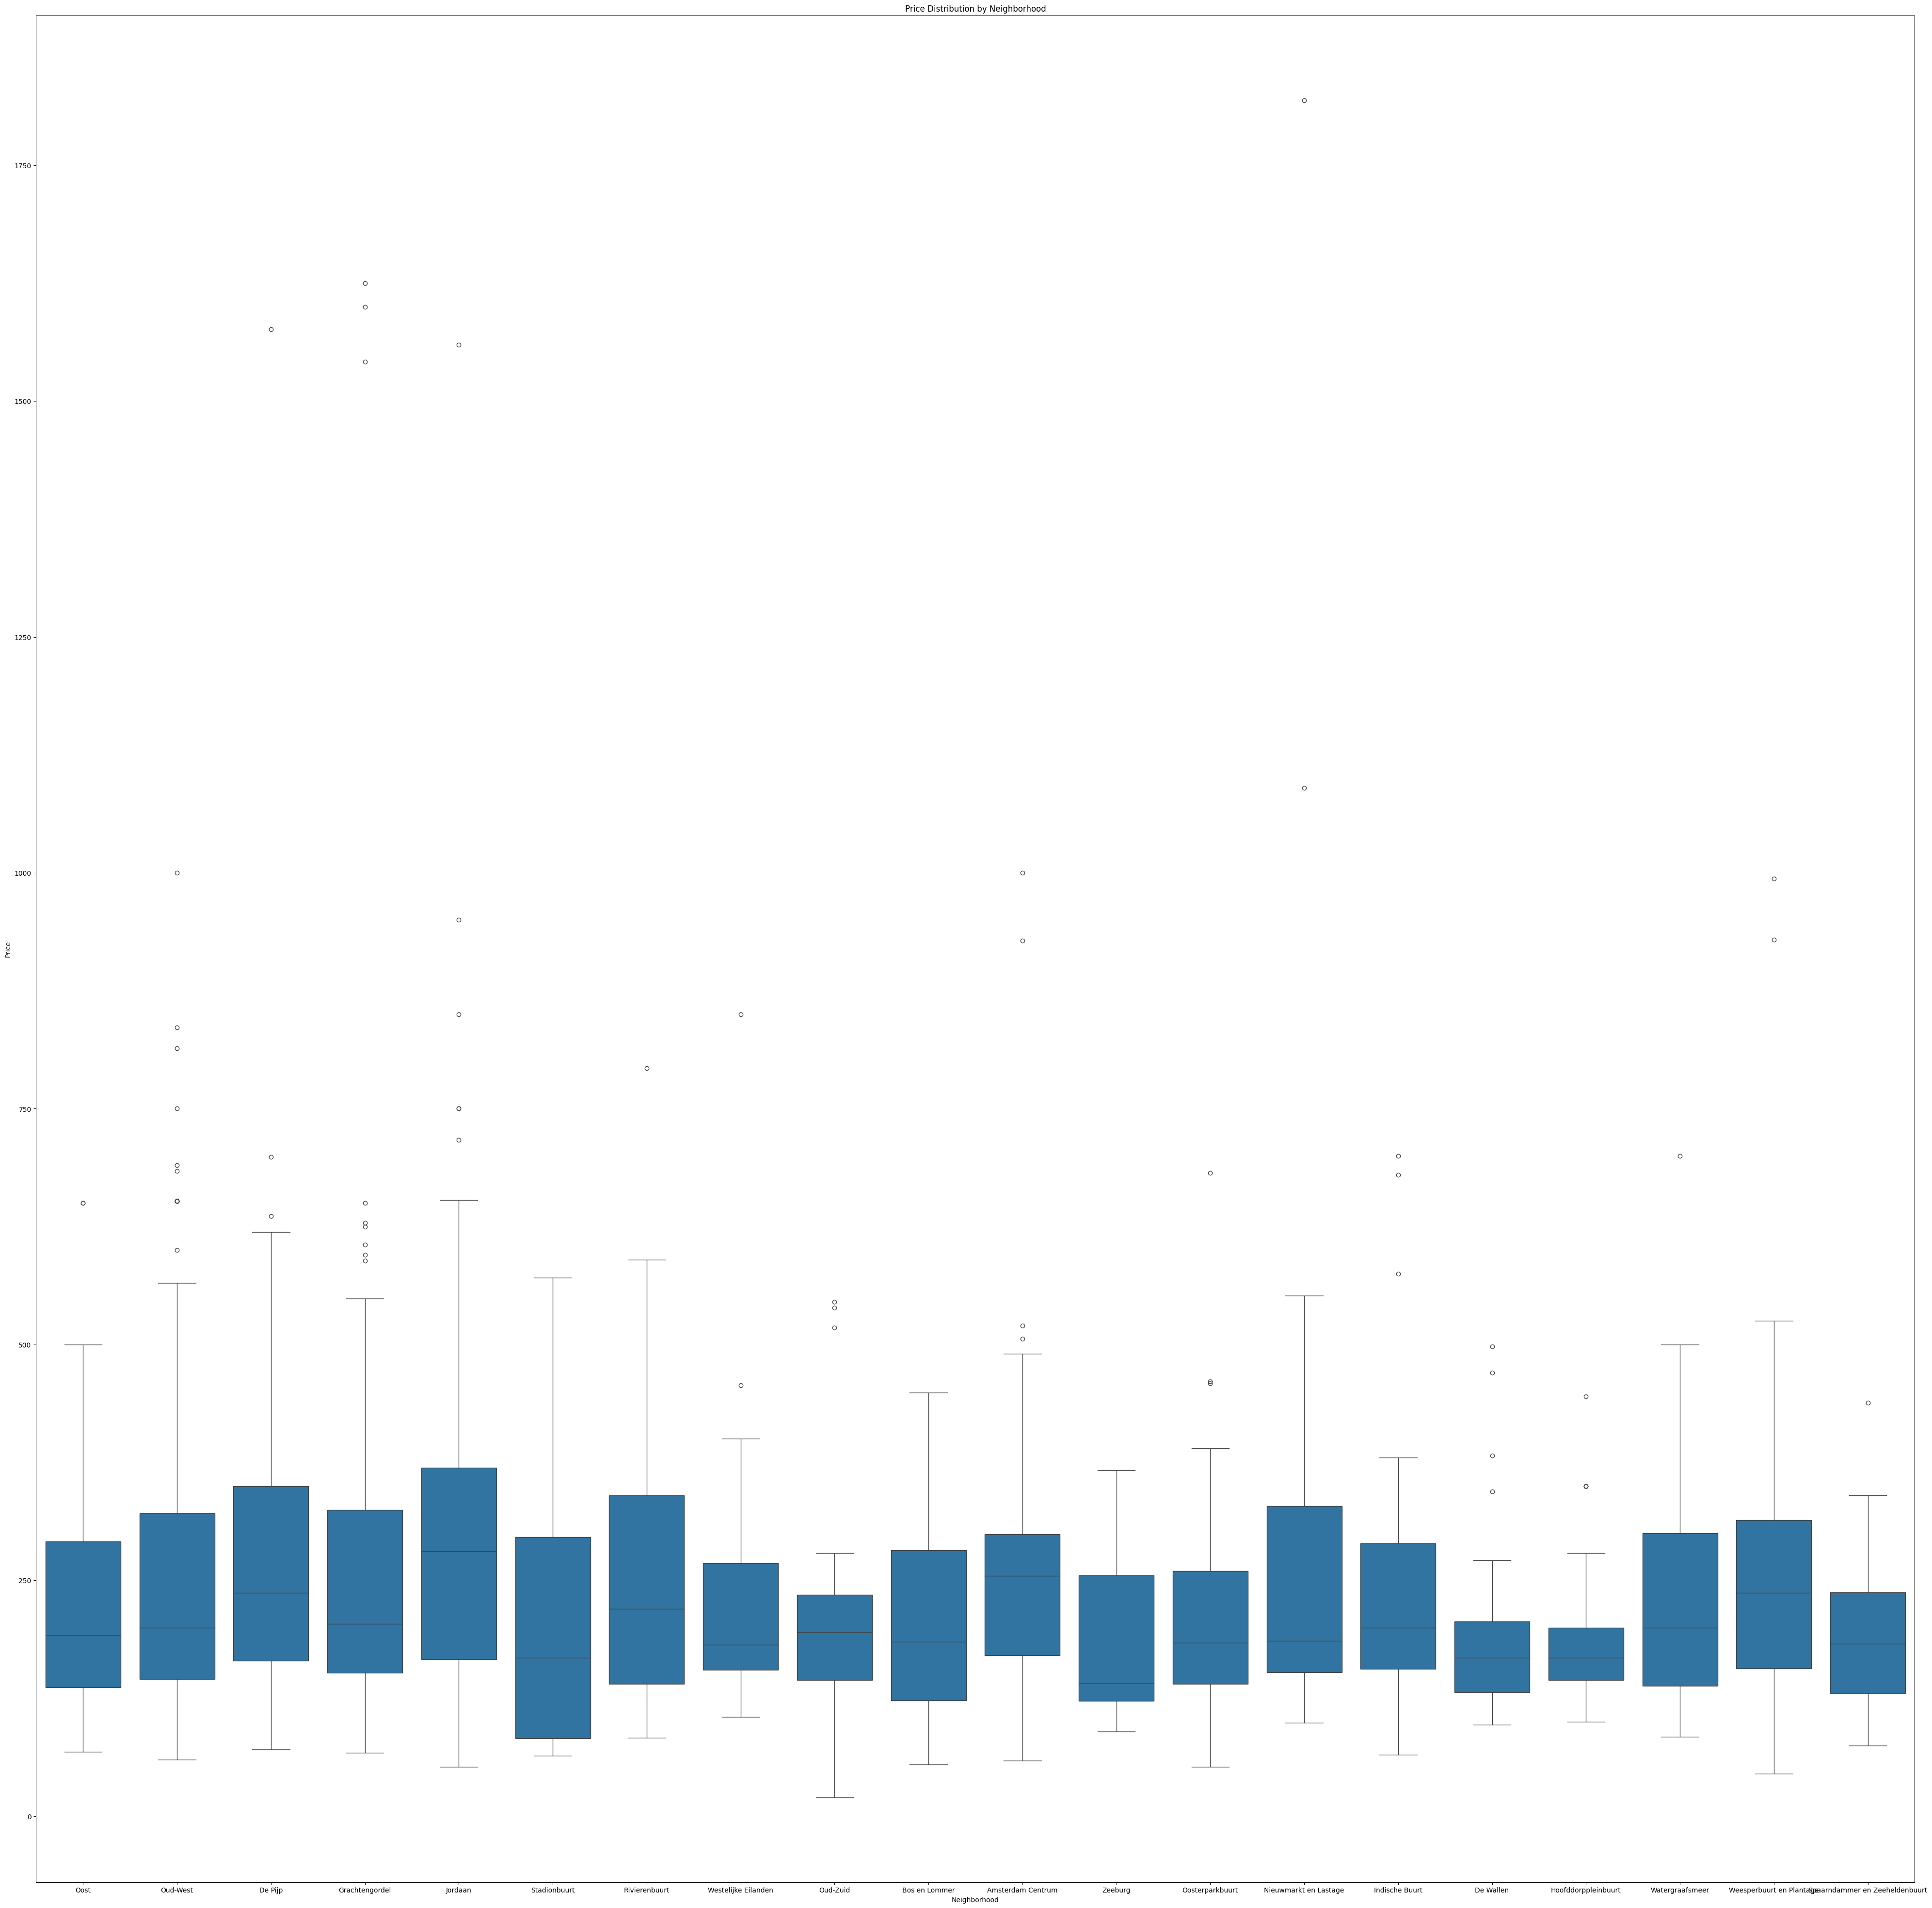

In [73]:
# Boxplot to show price distribution by neighborhood
plt.figure(figsize=(50, 50))
sns.boxplot(x='host_neighbourhood', y='price', data=neighborhood_filtered_listing_amsterdam_df)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

# Task 4 - Part D(ii): Box plots to show price distribution across different neighbourhood

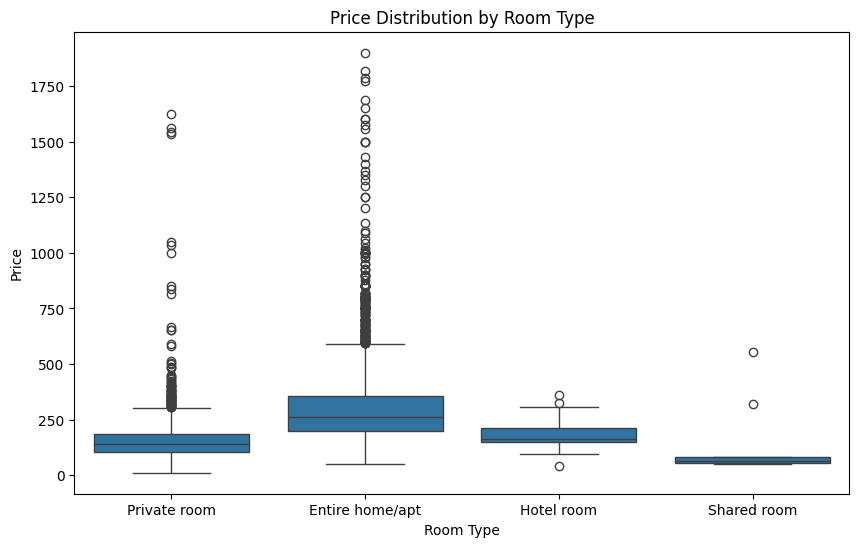

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=filtered_listing_amsterdam_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()